In [1]:
import pandas as pd
import statistics as st
import numpy as np
import time 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
df = pd.read_csv('challenge_data_20.csv',index_col='time',parse_dates=True)
# df['time'] = pd.to_datetime(df['time'] )
# df['time']
# df = df.set_index('time')
df.head()

operating_hours  fuel_consumption(liter)   engine_id
time                                                            
2017-12-19             3726                   3404.8  8331744407
2017-12-20             3746                   3865.6  8331744407
2017-12-21             3748                   3891.2  8331744407
2017-12-22             3768                   3840.0  8331744407
2017-12-23             3776                   3891.2  8331744407

In [3]:
def empty_col_reduct(df):
    col = df.columns.tolist()
    for c in col:
        v = (df[c].isnull().sum()*100)/len(df)
        print(v)
        
        
empty_col_reduct(df)

0.0
0.0
0.0


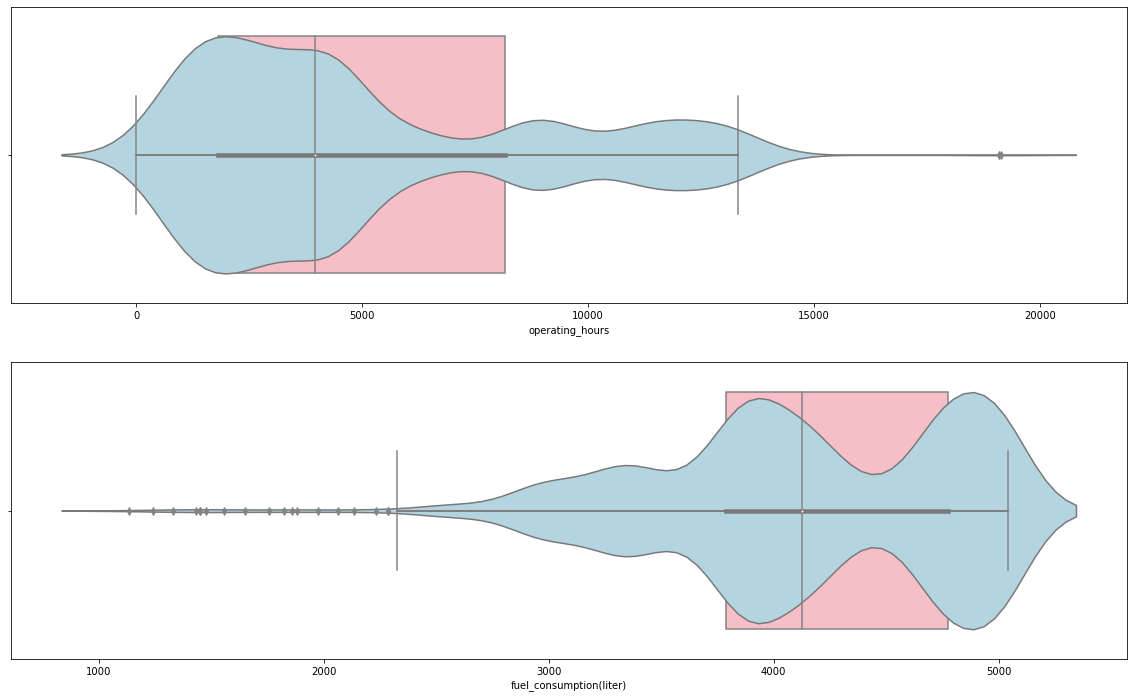

In [4]:
fig, ax = plt.subplots(2,figsize=(20, 12))

sns.boxplot(df['operating_hours'],ax=ax[0],palette=["lightpink"])
sns.violinplot(df['operating_hours'],ax=ax[0],palette=["lightblue"])
sns.boxplot(df['fuel_consumption(liter)'],ax=ax[1],palette=["lightpink"])
sns.violinplot(df['fuel_consumption(liter)'],ax=ax[1],palette=["lightblue"])

In [5]:
mask1 = df['operating_hours']<14000
mask3 = df['operating_hours']>0
mask2 = df['fuel_consumption(liter)']>2450
mask4 = df['fuel_consumption(liter)']<5200

df = df[mask1 & mask2 & mask3 & mask4]

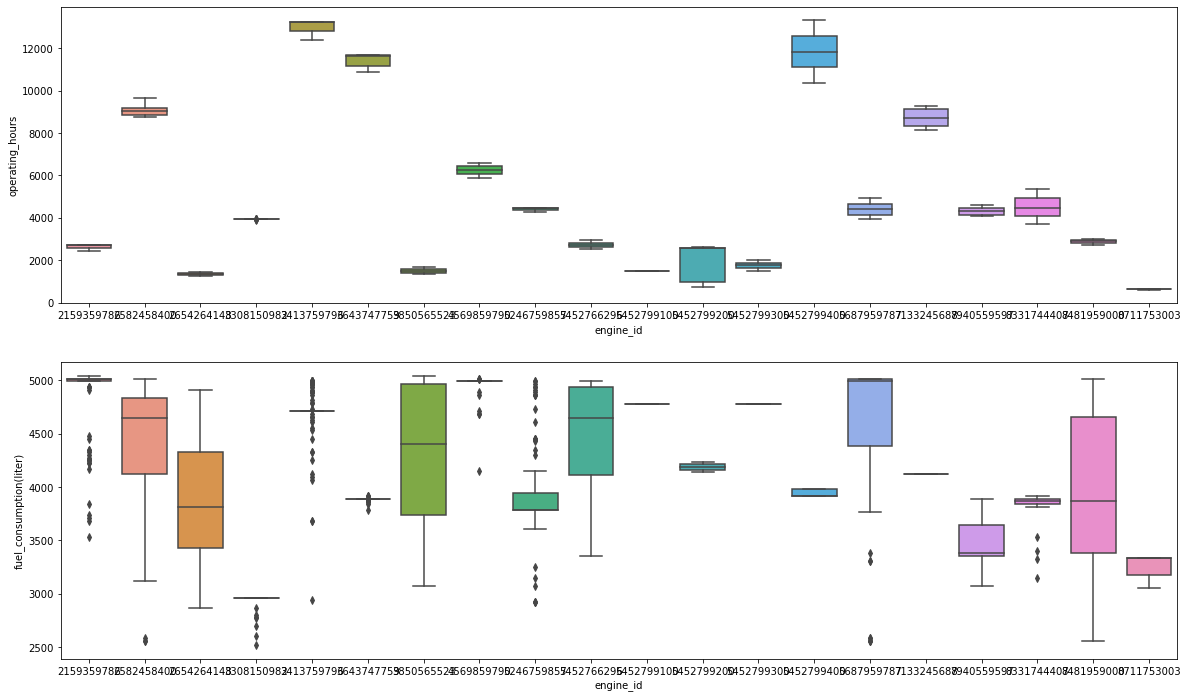

In [6]:
fig, ax = plt.subplots(2,figsize=(20, 12))
sns.boxplot(data=df,x='engine_id',y='operating_hours',ax=ax[0]);
sns.boxplot(data=df,x='engine_id',y='fuel_consumption(liter)',ax=ax[1]);

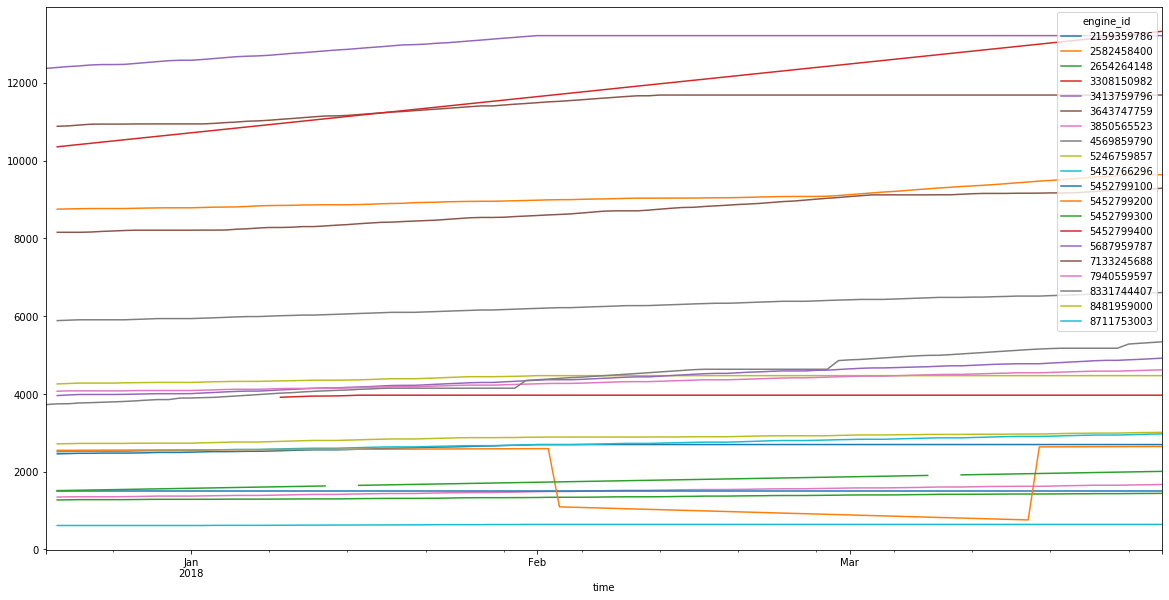

In [7]:
# for x in user_id_list:
#     df_here = df_id_wise.get_group(x)
#     df_here['operating_hours'].plot(figsize=(12,5));
#     print(df_here.head())
df.pivot( columns="engine_id", values="operating_hours").plot(figsize=(20,10))
    

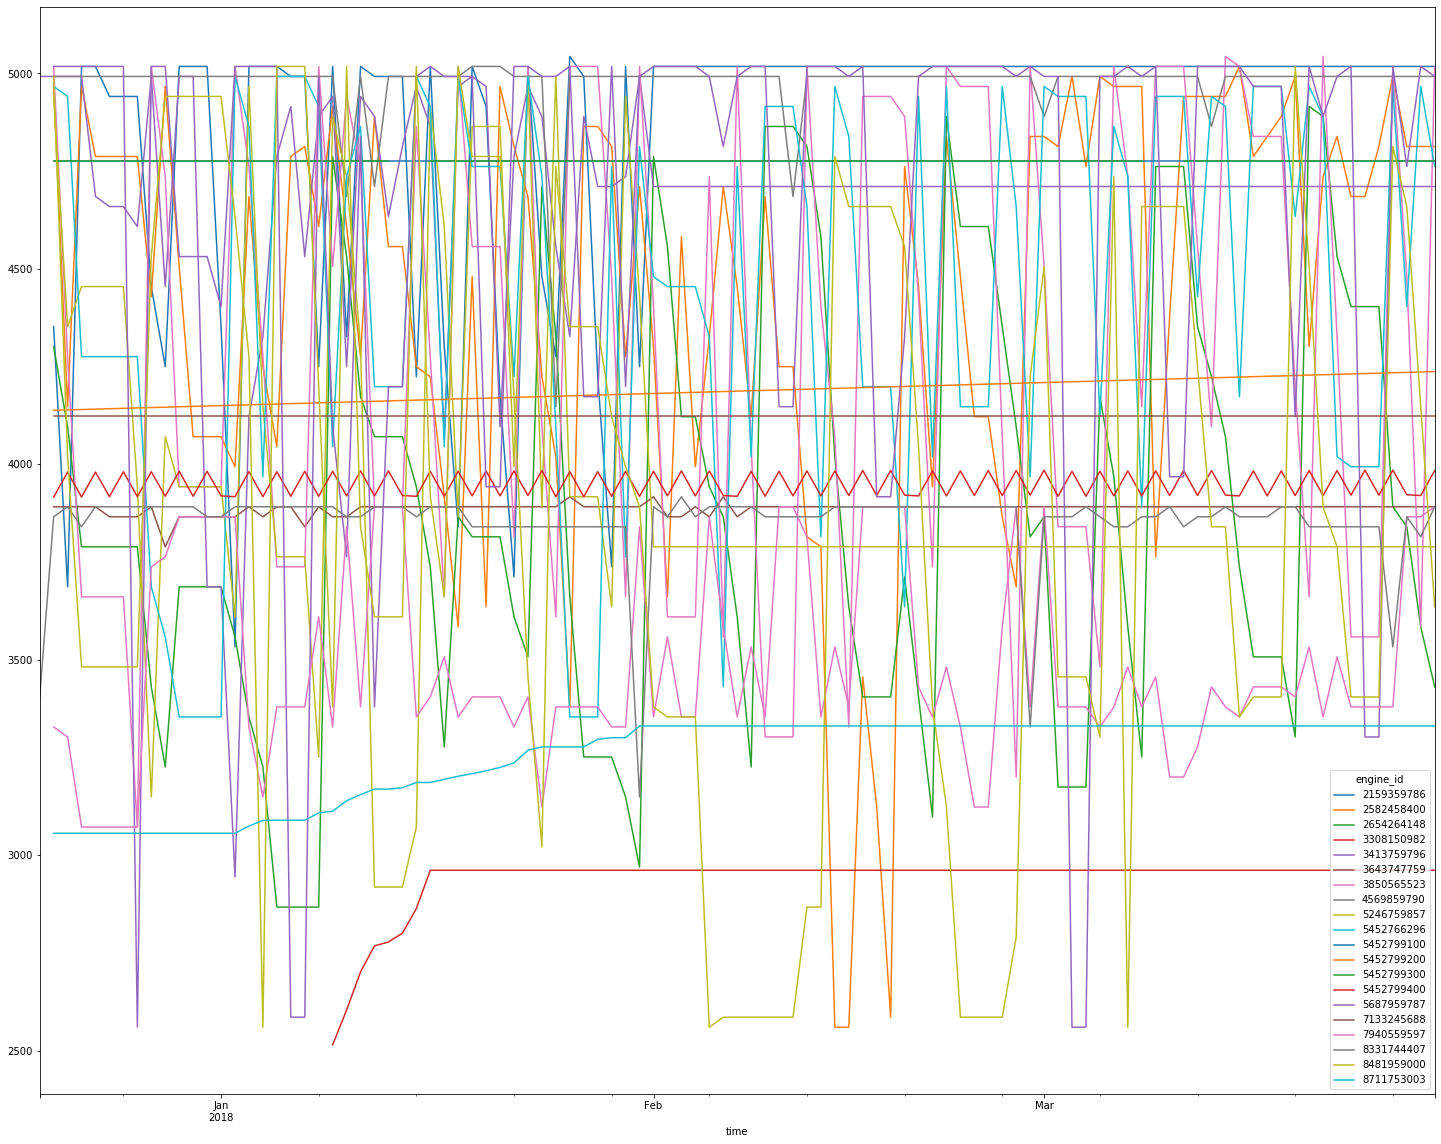

In [8]:
df.pivot( columns="engine_id", values="fuel_consumption(liter)").plot(figsize=(25,20))

In [9]:
df_id_wise = df.groupby('engine_id')
user_id_list = list(df_id_wise.groups.keys())
user_id_list.remove(user_id_list[12])
print(user_id_list)

[2159359786, 2582458400, 2654264148, 3308150982, 3413759796, 3643747759, 3850565523, 4569859790, 5246759857, 5452766296, 5452799100, 5452799200, 5452799400, 5687959787, 7133245688, 7940559597, 8331744407, 8481959000, 8711753003]


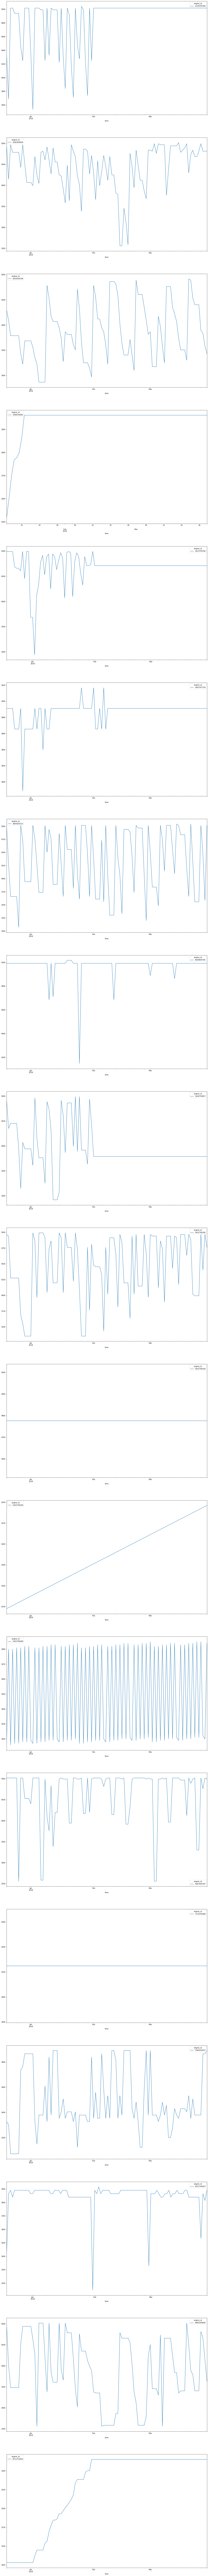

In [10]:
fig, ax = plt.subplots(len(user_id_list),figsize=(20, 20))
i=0
plt.subplots_adjust(bottom=0.1, right=0.8, top=10.9)

for x in user_id_list:
    
    df_id_wise.get_group(x).pivot( columns="engine_id", values="fuel_consumption(liter)").plot(figsize=(25,20),ax=ax[i])
    i+=1

In [11]:
oh_log = np.log(df['operating_hours'])

In [12]:
fc_log = np.log(df['fuel_consumption(liter)'])


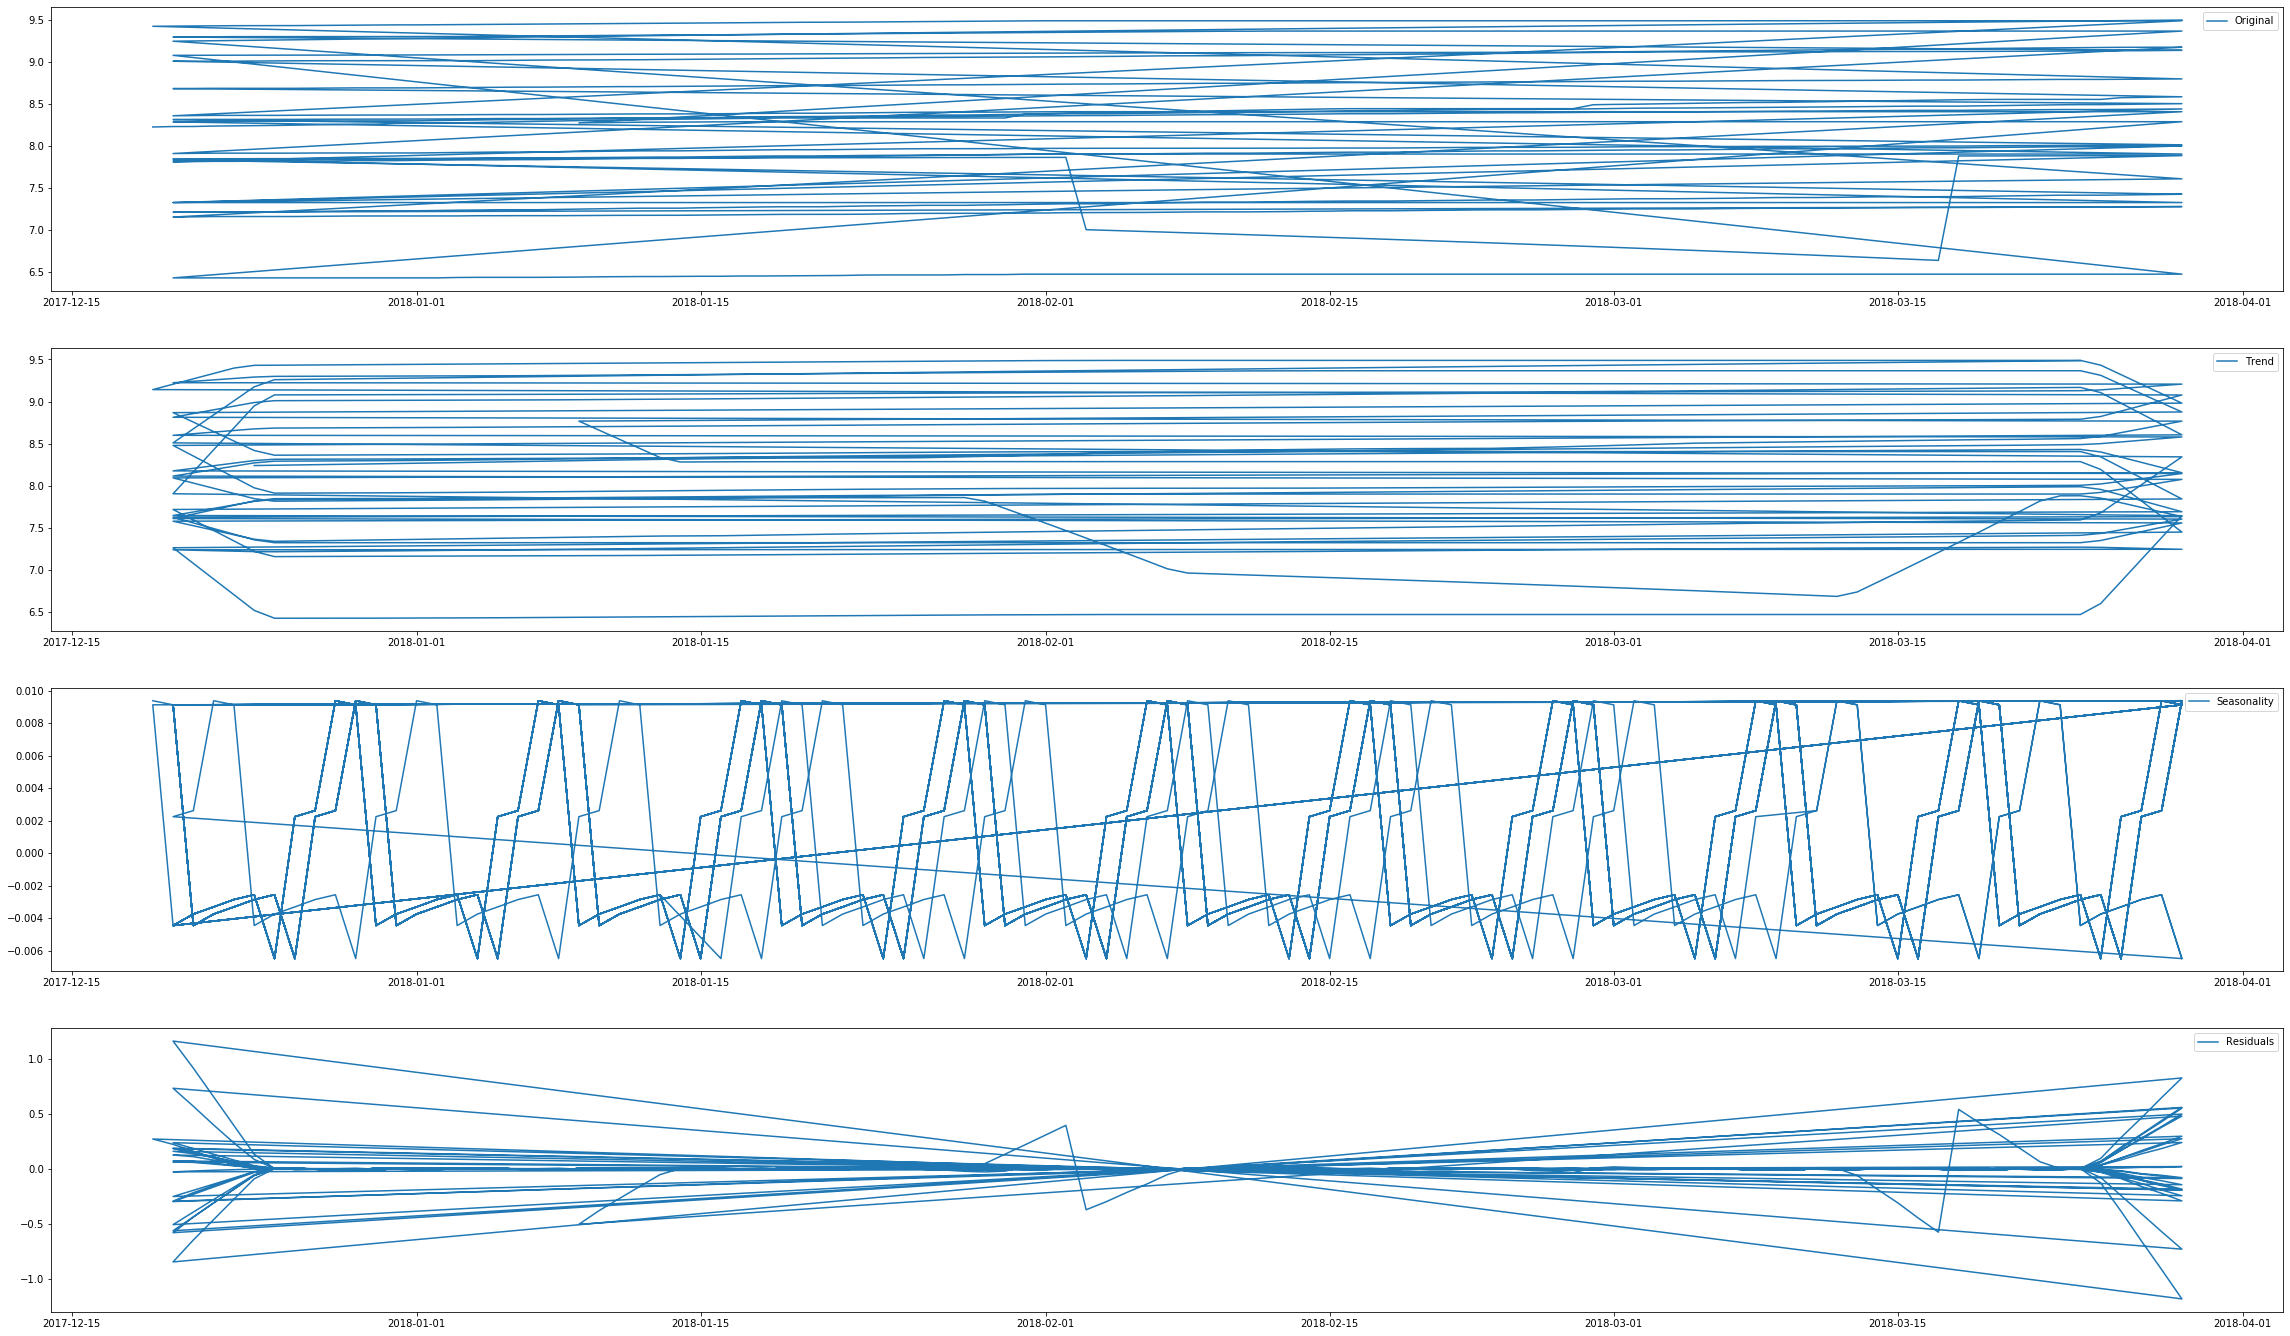

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(oh_log,model='additive',freq=10)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, ax = plt.subplots(4,figsize=(40, 24))

# sns.lineplot(data=df['operating_hours'],ax=ax[0],label='Original');
# sns.lineplot(data=trend,ax=ax[1],label='Trend');
# sns.lineplot(data=seasonal,ax=ax[2],label='Seasonality');
# sns.lineplot(data=residual,ax=ax[3],label='Residuals');

ax[0].plot(oh_log, label='Original')
ax[0].legend(loc='best')
ax[1].plot(trend, label='Trend')
ax[1].legend(loc='best')
ax[2].plot(seasonal,label='Seasonality')
ax[2].legend(loc='best')
ax[3].plot(residual, label='Residuals')
ax[3].legend(loc='best')
# oh_log.plot(figsize=(20,10))

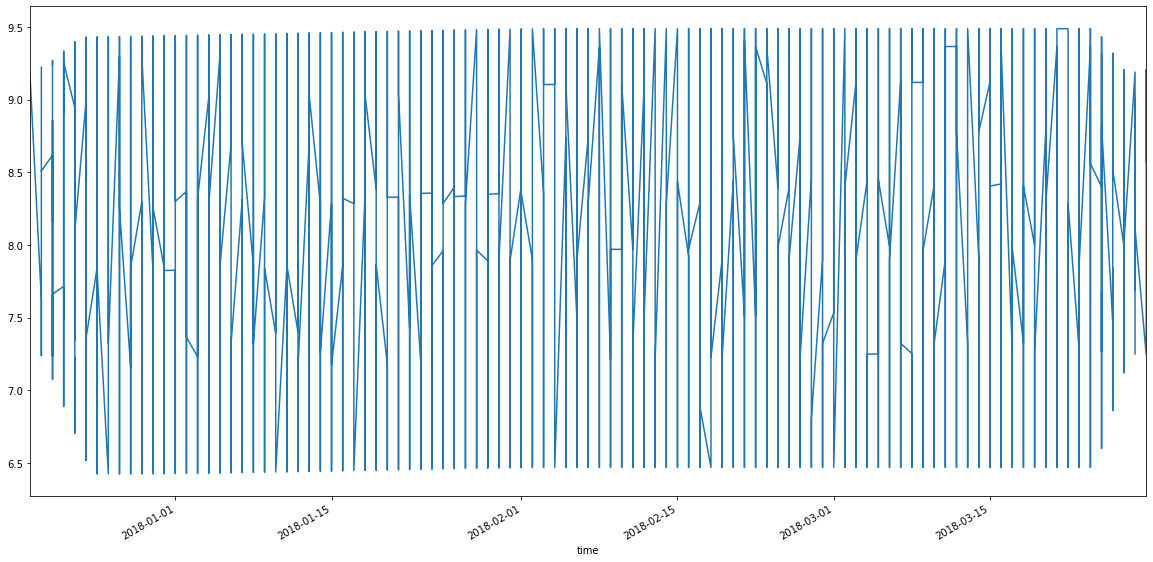

In [14]:
trend.plot(figsize=(20,10))

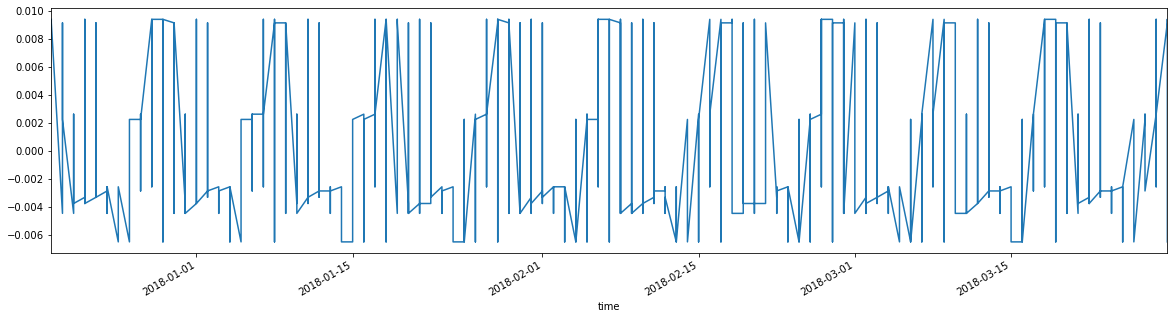

In [15]:
seasonal.plot(figsize=(20,5))

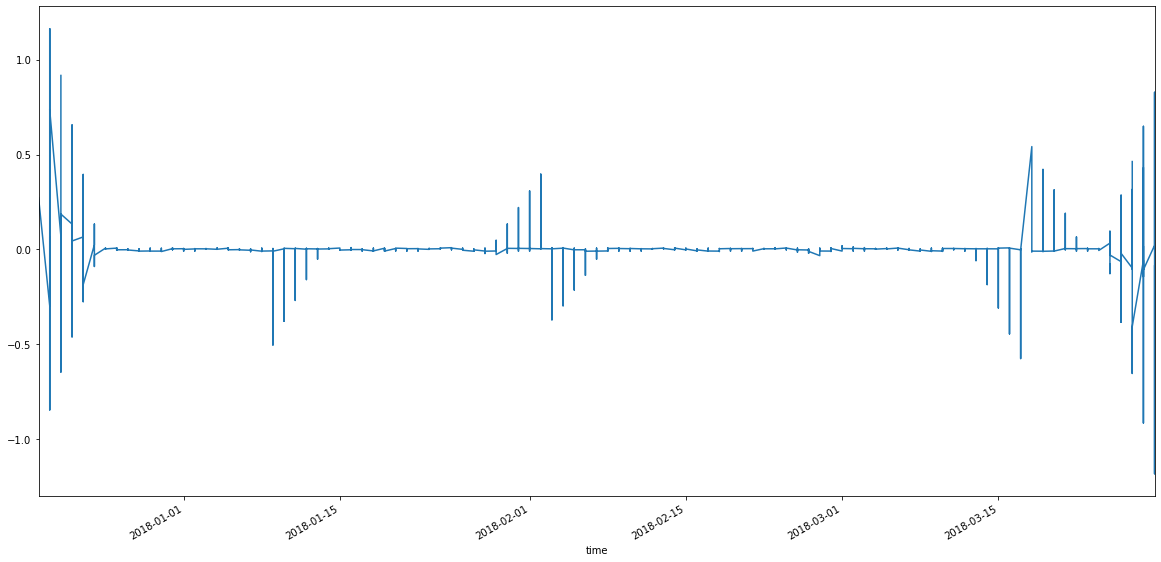

In [16]:
residual.plot(figsize=(20,10))

In [17]:
def mode_plot(df_id_wise,x,ax,col):
    g = df_id_wise.get_group(x)
#     g.info()
    train_data = g.iloc[:80]
    test_data = g.iloc[79:]
    fit_model = ExponentialSmoothing(train_data[col], trend='add', seasonal='add',seasonal_periods=10).fit()
    test_pred = fit_model.forecast(len(test_data))
    error = np.sqrt(mean_squared_error(test_data[col],test_pred))
    print('RMSE of {} is '.format(x),str(error))
    try:
        train_data[col].plot(legend=True,label="Train",figsize=(20,5),ax=ax)
        test_data[col].plot(legend=True,label="Test",ax=ax)
        test_pred.plot(legend=True,label='Prediction',ax=ax)
        
        
        
    except:
        pass
    
    return error
    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE of 2159359786 is  9.599883079076545


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 2582458400 is  19.801980591818996
RMSE of 2654264148 is  14.057997492785683


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 3308150982 is  0.023936580137615238


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 3413759796 is  67.21876098939234


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE of 3643747759 is  12.174778174653337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE of 3850565523 is  6.563554613082319


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE of 4569859790 is  37.176387668842615


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE of 5246759857 is  3.7246720878183135


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5452766296 is  7.9923176759360075


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:924: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:930: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5452799100 is  0.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5452799200 is  1605.953735063227


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5452799400 is  35.19156420966239


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5687959787 is  15.679188064414182


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 7133245688 is  104.70463585502198


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 7940559597 is  16.14919993187604


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 8331744407 is  99.07669183617723


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE of 8481959000 is  12.707418796183033


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 8711753003 is  0.5318799098781328
Mean RMSE of Operating_hours is  108.8593990852623


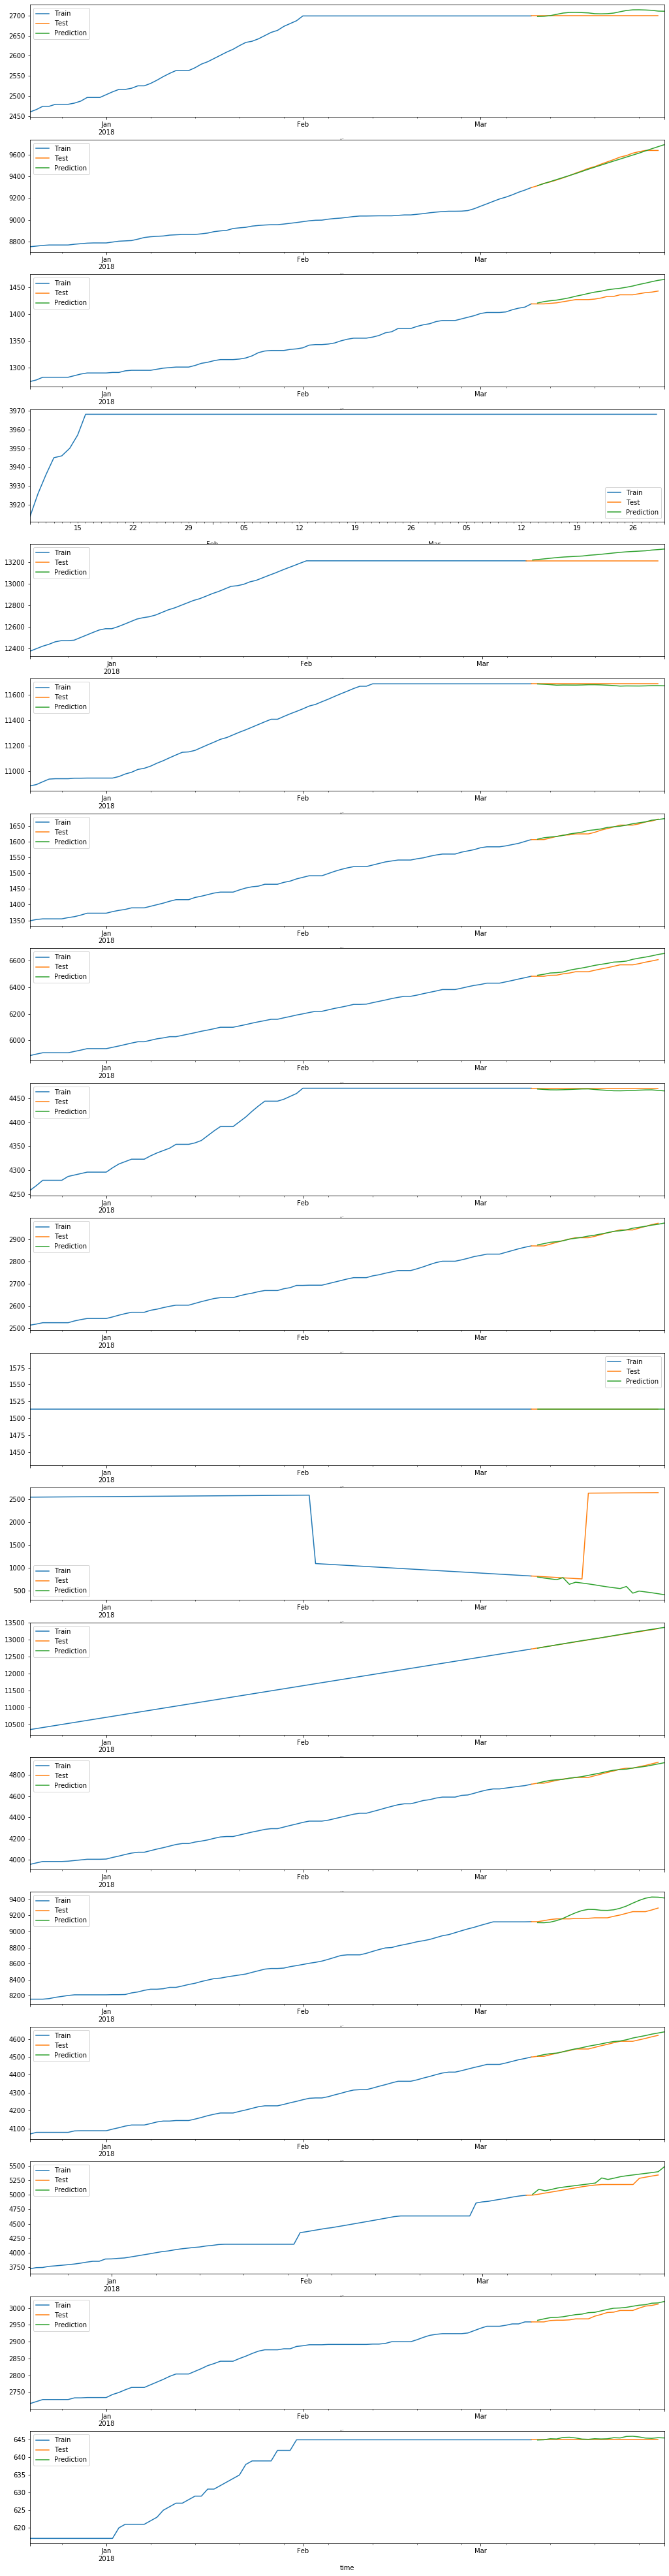

In [18]:
fig, ax = plt.subplots(len(user_id_list),figsize=(20, 20))
i=0
plt.subplots_adjust(bottom=0.1, right=0.8, top=10.9)
error_list = []
for x in user_id_list:
    error_list.append(mode_plot(df_id_wise,x,ax[i],'operating_hours'))
    i+=1
print("Mean RMSE of Operating_hours is ",str(st.mean(error_list)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 2159359786 is  119.99466667433177
RMSE of 2582458400 is  416.05611379030944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 2654264148 is  1040.3046867906742


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 3308150982 is  1.4546994917418488
RMSE of 3413759796 is  109.46973909855255


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 3643747759 is  3.344297563124844


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE of 3850565523 is  614.0181009838318


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE of 4569859790 is  27.48832808641022


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5246759857 is  189.31389574216752


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5452766296 is  479.58430817100714


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:924: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:930: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)


RMSE of 5452799100 is  0.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5452799200 is  0.9129498011735899


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5452799400 is  30.974360494149355


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 5687959787 is  803.1050795083854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:924: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:930: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 7133245688 is  0.0
RMSE of 7940559597 is  184.6432887599552


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of 8331744407 is  85.78758640298572
RMSE of 8481959000 is  624.6491651477126


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RMSE of 8711753003 is  4.759183187975548


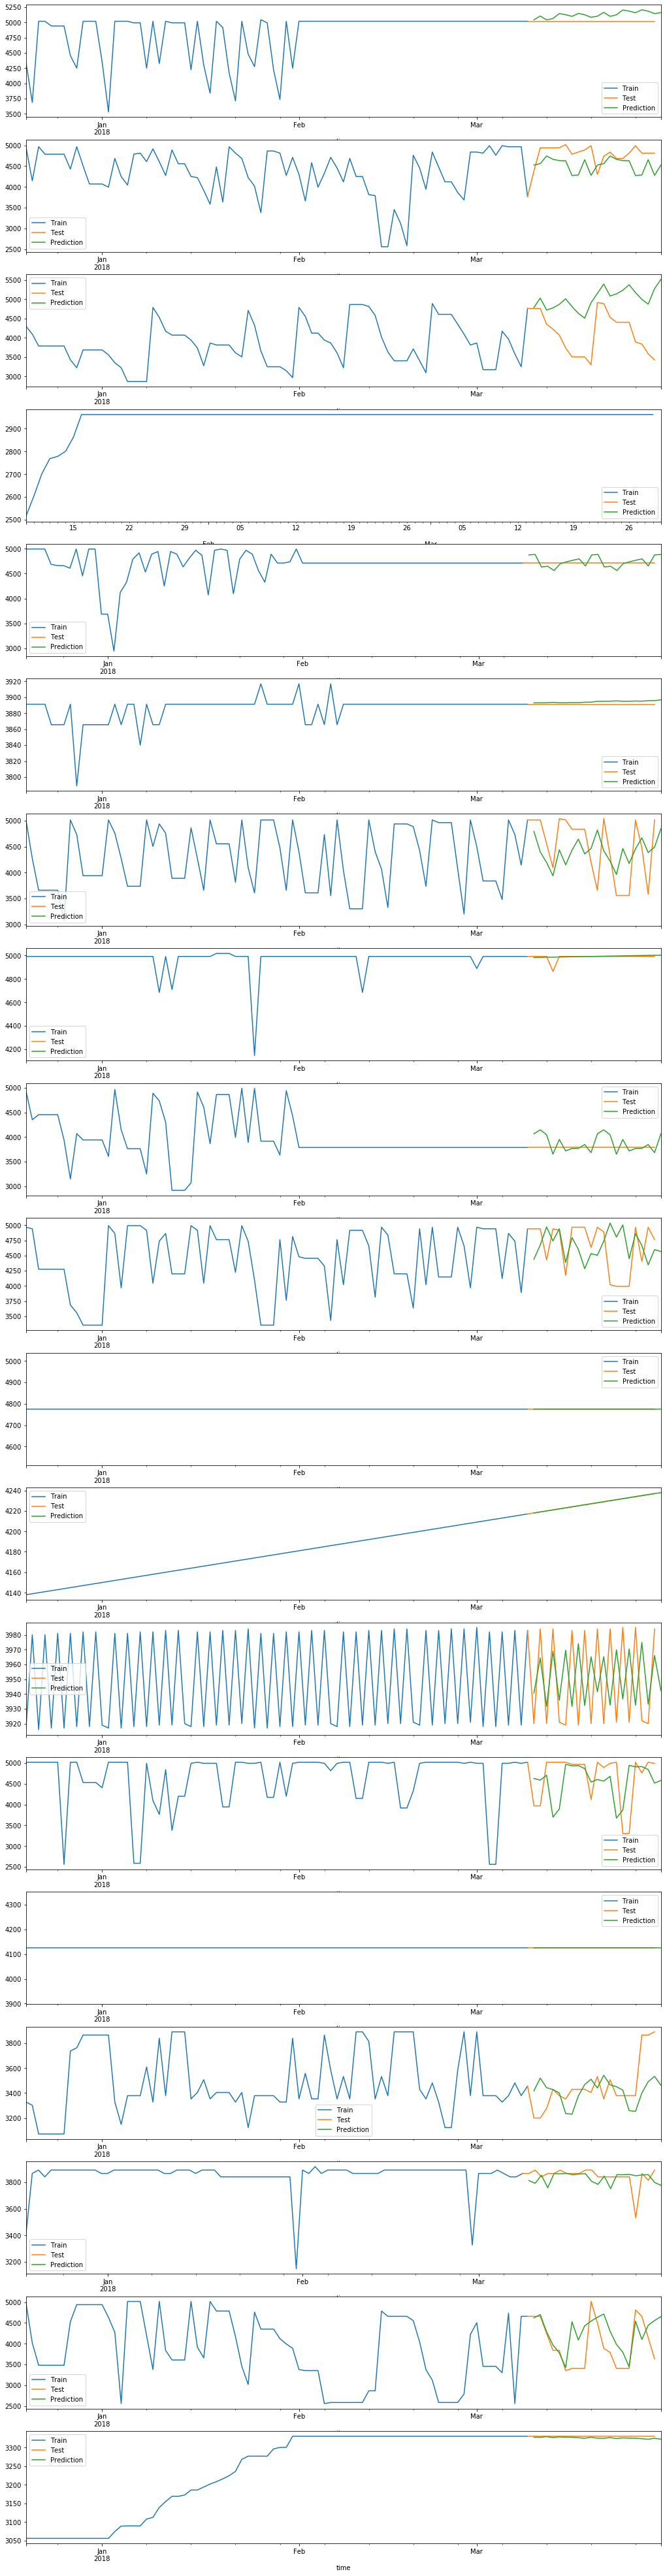

In [19]:
fig, ax = plt.subplots(len(user_id_list),figsize=(20, 20))
i=0
plt.subplots_adjust(bottom=0.1, right=0.8, top=10.9)

for x in user_id_list:
    mode_plot(df_id_wise,x,ax[i],'fuel_consumption(liter)')
    i+=1

In [20]:
def forecast_15(df_id_wise,user_id_list,col):
    
    op_df = pd.DataFrame()
    for x in user_id_list:
        g = df_id_wise.get_group(x)
        train_data = g
        fit_model = ExponentialSmoothing(train_data[col], trend='add', seasonal='add',seasonal_periods=10).fit()
        test_pred = fit_model.forecast(15)
        op_df[str(x)] = test_pred
    op_df.to_csv(r'output_{}.csv'.format(col))
    

In [21]:
forecast_15(df_id_wise,user_id_list,'operating_hours')
forecast_15(df_id_wise,user_id_list,'fuel_consumption(liter)')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base